In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
DOLPHINS_data = pd.read_csv('DOLPHIN_SIGHTINGS.csv')
DOLPHINS_data.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000,0
1,0,100,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000,0
2,0,200,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2999,0
3,0,300,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2999,0
4,0,400,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2999,0


In [12]:
DIVING_GEAR_data = pd.read_csv('DIVING_GEAR.csv')
DIVING_GEAR_data.head()


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,DIVING_GEAR,99999,6,99998.0,19.0,NaN,NaN,100001,6,100002.0,19.0,NaN,NaN,100000.0,0.000000
1,0,100,DIVING_GEAR,99999,5,99998.0,12.0,NaN,NaN,100001,5,100002.0,12.0,NaN,NaN,100000.0,0.000000
2,0,200,DIVING_GEAR,100002,2,100001.0,10.0,100000.0,14.0,100003,10,100004.0,14.0,NaN,NaN,100002.5,-2.875000
3,0,300,DIVING_GEAR,99999,9,99998.0,11.0,NaN,NaN,100001,9,100002.0,11.0,NaN,NaN,100000.0,-1.140625
4,0,400,DIVING_GEAR,99993,19,NaN,NaN,NaN,NaN,99996,19,NaN,NaN,NaN,NaN,99994.5,4.484375


In [5]:
MAYBERRIES_data = pd.read_csv('MAYBERRIES.csv')
MAYBERRIES_data.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,2,0,BERRIES,3847,55,NaN,NaN,NaN,NaN,3854,10,3855.0,45.0,NaN,NaN,3850.5,0.000000
1,2,100,BERRIES,3847,19,3846.0,58.0,NaN,NaN,3854,19,3855.0,58.0,NaN,NaN,3850.5,0.000000
2,2,200,BERRIES,3851,5,3848.0,13.0,3847.0,57.0,3854,13,3855.0,57.0,NaN,NaN,3852.5,58.281250
3,2,300,BERRIES,3848,15,3847.0,44.0,NaN,NaN,3855,15,3856.0,44.0,NaN,NaN,3851.5,47.984375
4,2,400,BERRIES,3849,16,3848.0,57.0,NaN,NaN,3855,16,3856.0,57.0,NaN,NaN,3852.0,39.984375


In [10]:
DIVING_data = pd.merge(DIVING_GEAR_data, DOLPHINS_data, how = 'inner', on = ['day','timestamp'])
DIVING_data.dropna(axis=1, how = 'all', inplace = True)

99401.0992

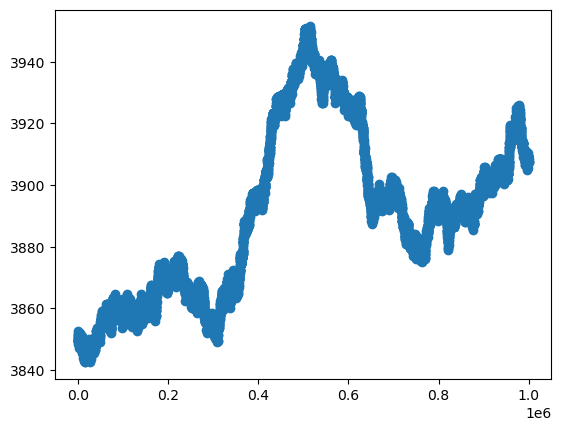

In [41]:
plt.scatter(MAYBERRIES_data['timestamp'], MAYBERRIES_data['mid_price'])


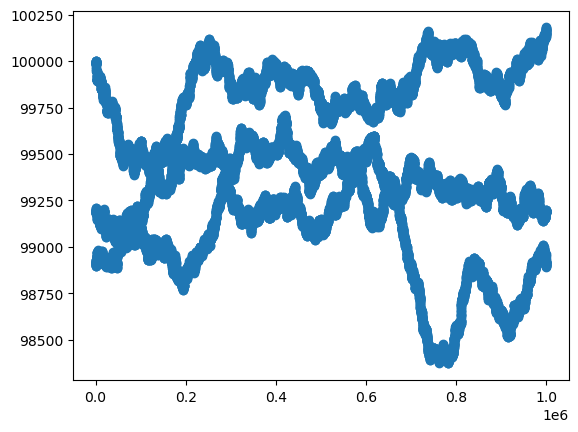

In [42]:
plt.scatter(DIVING_data['timestamp'], DIVING_data['mid_price_x'])

<AxesSubplot:>

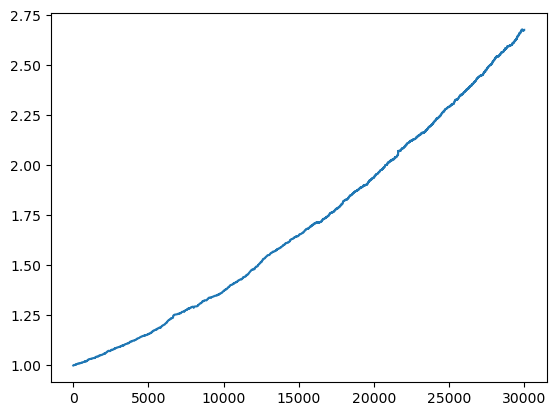

In [54]:
# specify predictor and target commodities
data = {'mid_price_y':DIVING_data['mid_price_y'].tolist(), 'mid_price_x':DIVING_data['mid_price_x'].tolist()}
df = pd.DataFrame(data)


commodity = 'mid_price_y'
target = 'mid_price_x'

# calculate the SMA for the commodity
df['sma'] = df[commodity].rolling(window=6).mean()

# buy or sell the commodity based on the SMA indicator
df['position'] = 0
df.loc[df[commodity] < df['sma'], 'position'] = 1
df.loc[df[commodity] > df['sma'], 'position'] = -1

# calculate the daily return of the strategy
df['return'] = df['position'].shift(1) * (df[commodity].pct_change())

# calculate the cumulative return of the strategy
cumulative_return = (1 + df['return']).cumprod()

# plot the cumulative return of the strategy
cumulative_return.plot()